### Mengimport library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
# membaca data file
data = pd.read_csv('data_banknote_authentication.csv', header=None)
data

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


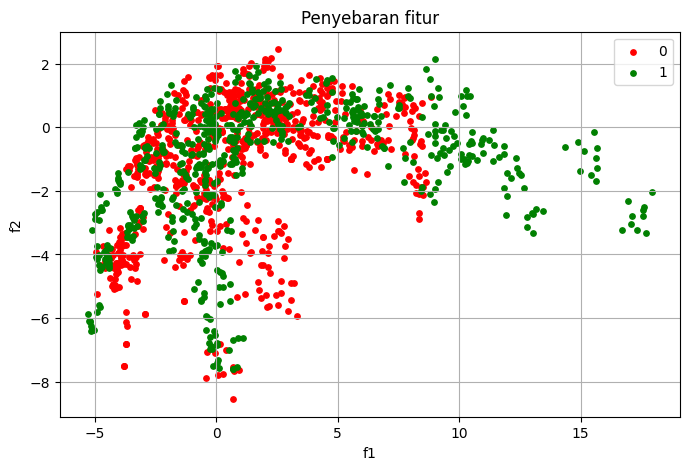

In [3]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_title('Penyebaran fitur')

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data[4] == target
    ax.scatter(data.loc[indicesToKeep, 2], data.loc[indicesToKeep, 3], c = color, s = 15)
ax.legend(targets)
ax.grid()

### Melakukan analisa terhadap data

In [4]:
# melihat tipe data dan apakah ada data yang kosong atau tidak
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
data.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
# memisahkan fitur dan target (kelas)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

### visualisasi fitur

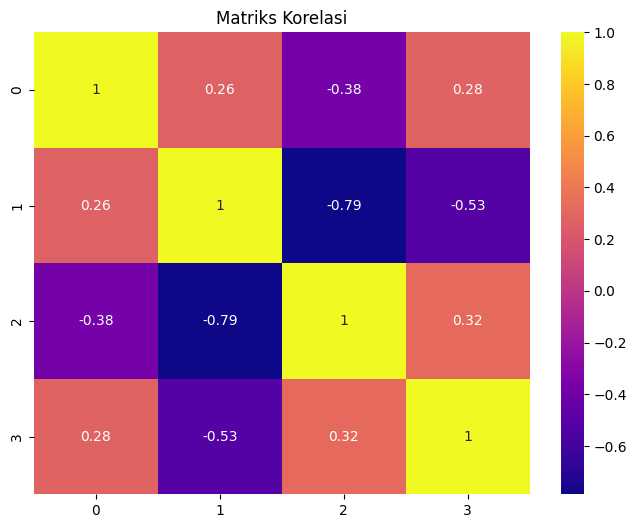

In [7]:
# melakukan plot untuk melihat hubungan setiap fitur
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap='plasma')
plt.title('Matriks Korelasi')
plt.show()

### Menerapkan PCA

In [8]:
# menormalkan data sebelum menerapkan PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVC(), X_scaled, y, cv=5)
print("CV Accuracy:", scores.mean())

CV Accuracy: 1.0


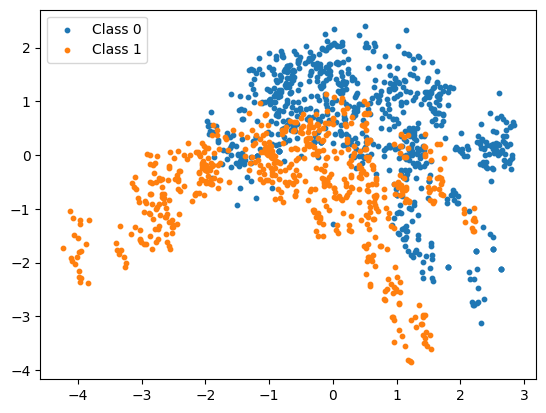

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], label="Class 0", s=10)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], label="Class 1", s=10)
plt.legend()
plt.show()

In [11]:
import pandas as pd
# Hitung mean/std per kelas
print(data.groupby(y).agg(['mean', 'std']))

          0                   1                   2                   3  \
       mean       std      mean       std      mean       std      mean   
4                                                                         
0  2.276686  2.019348  4.256627  5.138792  0.796718  3.239894 -1.147640   
1 -1.868443  1.881183 -0.993576  5.404884  2.148271  5.261811 -1.246641   

               4       
        std mean  std  
4                      
0  2.125077  0.0  0.0  
1  2.070984  1.0  0.0  


In [12]:
X_scaled.dtype

dtype('float64')

In [13]:
# menginisialisasikan PCA dan mereduksi fitur menjadi 2d
pca = PCA(n_components=2)
dataPCA = pca.fit_transform(X_scaled)

In [14]:
dataPCA

array([[ 1.47280494,  1.16391668],
       [ 1.63944068,  1.09381204],
       [-0.51391884,  1.32487953],
       ...,
       [-4.04932734, -2.03602288],
       [-3.01961738, -1.39214023],
       [-1.17058249, -0.09103094]])

In [15]:
# menjadikan fitur baru hasil setelah PCA menjadi dataframe
principalDf = pd.DataFrame(data = dataPCA, columns = ['PC1', 'PC2'])
principalDf

,PC1,PC2
0,1.472805,1.163917
1,1.639441,1.093812
2,-0.513919,1.324880
3,2.310952,0.202514
4,-1.193416,-0.024654
...,...,...
1367,0.221995,0.290458
1368,-1.909395,-0.142149
1369,-4.049327,-2.036023
1370,-3.019617,-1.392140


In [16]:
# menggabungkan fitur baru dengan data target atau kelas
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf

,PC1,PC2,4
0,1.472805,1.163917,0
1,1.639441,1.093812,0
2,-0.513919,1.324880,0
3,2.310952,0.202514,0
4,-1.193416,-0.024654,0
...,...,...,...
1367,0.221995,0.290458,1
1368,-1.909395,-0.142149,1
1369,-4.049327,-2.036023,1
1370,-3.019617,-1.392140,1


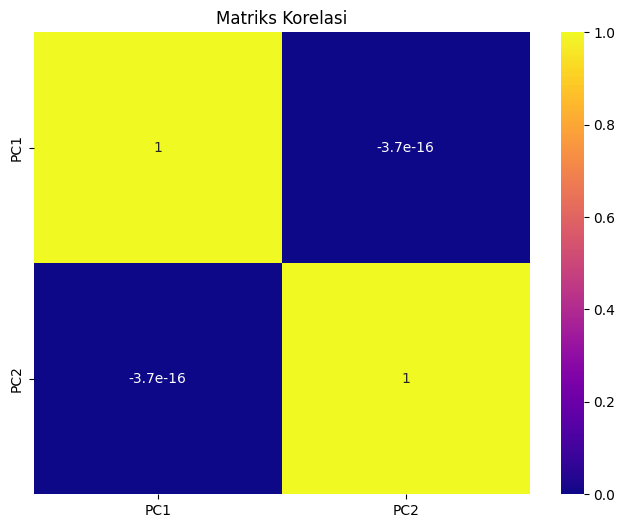

In [17]:
# visualisasi fitur baru
plt.figure(figsize=(8,6))
sns.heatmap(principalDf.corr(), annot=True, cmap='plasma')
plt.title('Matriks Korelasi')
plt.show()

### Plot fitur baru hasil PCA

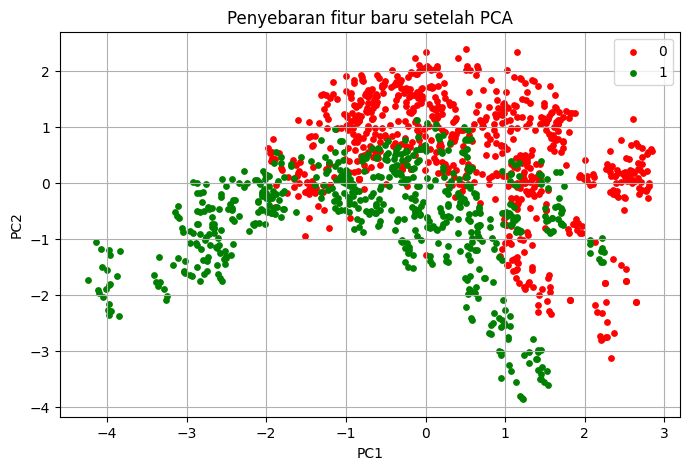

In [18]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title('Penyebaran fitur baru setelah PCA')

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[4] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2'], c = color, s = 15)
ax.legend(targets)
ax.grid()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8)

In [20]:
model = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Tuning
grid_search = RandomizedSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']})

In [21]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 1}
Best Score: 1.0


In [22]:
best_model = grid_search.best_estimator_

In [23]:
# Membuat meshgrid (grid titik untuk plot decision boundary)
h = 0.01  # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Prediksi untuk setiap titik grid
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary + data point
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
plt.title("Decision Boundary SVM pada Data PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
predict_test = best_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predict_test))

Accuracy:  1.0


In [ ]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       123

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



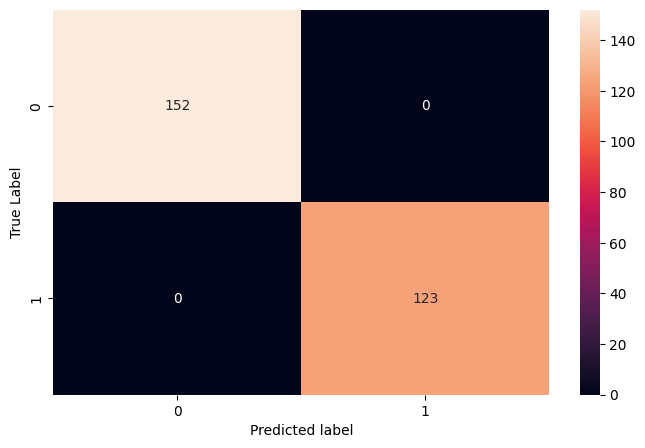

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predict_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# data PCA
X_train2, X_test2, y_train2, y_test2 = train_test_split(principalDf, y, train_size=0.8)

In [ ]:
modelPCA = SVC()
modelPCA.fit(X_train2, y_train2)

SVC()

In [ ]:
predict_test2 = modelPCA.predict(X_test2)
print("Accuracy: ", accuracy_score(y_test2, predict_test2))

Accuracy:  0.7818181818181819


In [ ]:
print(classification_report(y_test2, predict_test2))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       141
           1       0.80      0.74      0.77       134

    accuracy                           0.78       275
   macro avg       0.78      0.78      0.78       275
weighted avg       0.78      0.78      0.78       275



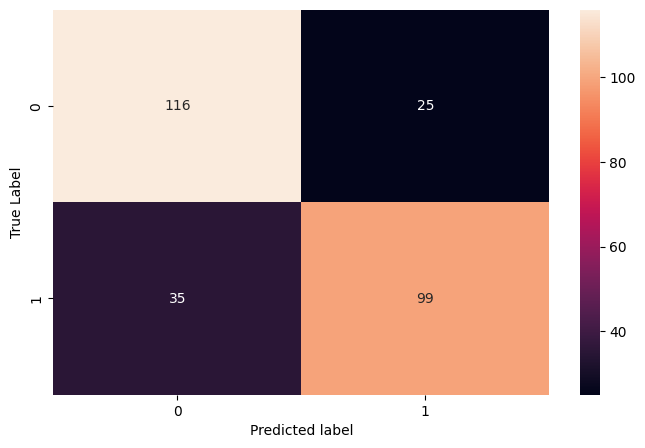

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test2, predict_test2), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.show()

### Prediksi Data Baru

In [ ]:
newPred1 = model.predict(np.array(X_scaled[1]).reshape(1, -1))
print(newPred1)

newPred2 = model.predict(np.array(X_scaled[1:10]))
print(newPred2)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
newPredPCA = modelPCA.predict(np.array(principalDf.iloc[1]).reshape(1, -1))
print(newPredPCA)

newPredPCA2 = modelPCA.predict(np.array(principalDf.iloc[1:10]))
print(newPredPCA2)

In [ ]:
data.head(10)